# Prosper Loan Data Analysis
## by Awele Esealuka



## Investigation Overview


In this investigation, I wanted to look at features that might affect the borrower rate and loan amount that borrowers get in the Prosper Loan dataset. For the presentation, I focused on just the influence of the Prosper rating, Prosper score, Credit score, and monthly income on loan amount and borrower rate, as well as home ownership. 


## Dataset Overview

The dataset consists of  76,768 rows and 19 colums containing data of Prosper loans from the year 2009 to 2014. I removed some rows and columns from the original dataset, also added new columns in order to get the one I worked with in this presentation.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")

#Variables of interest
loan_df = df[["ListingNumber", "ListingCreationDate", "LoanOriginationDate", "ProsperRating (Alpha)",
   "Term", "LoanStatus", "BorrowerRate", "ProsperScore", "ListingCategory (numeric)", "BorrowerState", 
    "EmploymentStatus", "StatedMonthlyIncome", "MonthlyLoanPayment", "LoanOriginalAmount", "IncomeRange", 
    "DebtToIncomeRatio", "IsBorrowerHomeowner", "CreditScoreRangeLower", "CreditScoreRangeUpper"]]

#drop duplicates
dup_index = loan_df[loan_df["ListingNumber"].duplicated() == True].index
loan_df = loan_df.drop(loan_df.index[loan_df.index.isin(list(dup_index))])


In [3]:
#convert to the right datatypes
loan_df["ListingCreationDate"] = pd.to_datetime(loan_df["ListingCreationDate"])
loan_df["LoanOriginationDate"] = pd.to_datetime(loan_df["LoanOriginationDate"])
loan_df["ListingCategory (numeric)"] = loan_df["ListingCategory (numeric)"].astype("category")
loan_df["LoanStatus"] = loan_df["LoanStatus"].astype("category")
loan_df["IncomeRange"] = loan_df["IncomeRange"].astype("category")
loan_df["EmploymentStatus"] = loan_df["EmploymentStatus"].astype("category")
loan_df["ProsperScore"] = loan_df["ProsperScore"].astype("category")

# convert ProsperRating (Alpha) to ordinal category type
order = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
ordered_cat = pd.api.types.CategoricalDtype(categories=order, ordered=True)
loan_df['ProsperRating (Alpha)'] = loan_df['ProsperRating (Alpha)'].astype(ordered_cat)

#select only listings from 2009 upwards
loan_df2 = loan_df[(loan_df.ListingCreationDate.dt.year >= 2009)]

#Select ProsperRating and DebtToIncomeRatio that is not null
loan_df2 = loan_df2[(loan_df2["ProsperRating (Alpha)"].isna() == False) & (loan_df2["DebtToIncomeRatio"].isna() == False)]


In [4]:
#Replace the numeric values in ListingCategory (numeric) with their actual values
loan_df2["ListingCategory (numeric)"] = loan_df2["ListingCategory (numeric)"].replace([ 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                                                                    ["Not Available", "Debt Consolidation", "Home Improvement", "Business", "Personal Loan", "Student Use", "Auto", "Other",
                                                                                     "Baby&Adoption", "Boat", "Cosmetic Procedure", "Engagement Ring", "Green Loans", "Household Expenses", "Large Purchases",
                                                                                     "Medical/Dental", "Motorcycle", "RV", "Taxes", "Vacation", "Wedding Loans"])

#Rename ProsperRating (Alpha) and ListingCategory (numeric) for consistency
loan_df2.rename(columns={"ListingCategory (numeric)": "ListingCategory", "ProsperRating (Alpha)": "ProsperRating"}, inplace=True)
loan_df2["ListingCategory"] = loan_df2["ListingCategory"].astype("category")

#Create a column that contains the average of bothe credit score ranges
loan_df2["CreditScoreAverage"] = (loan_df2["CreditScoreRangeUpper"] + loan_df2["CreditScoreRangeLower"])/2

#Drop columns that are no longer needed
loan_df2 = loan_df2.drop(columns=["CreditScoreRangeUpper", "CreditScoreRangeLower"], axis=1)

#Create credit score groups based on nerdwallet
bin_edges = [300,630,690,720,850]
bin_names = ["Bad", "Fair", "Good", "Excellent"]
loan_df2["CreditScoreLevel"] = pd.cut(loan_df2["CreditScoreAverage"], bin_edges, labels=bin_names)
loan_df2["CreditScoreLevel"].value_counts()

Fair         33921
Excellent    28175
Good         12124
Bad           2420
Name: CreditScoreLevel, dtype: int64

In [5]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76768 entries, 1 to 113936
Data columns (total 19 columns):
ListingNumber          76768 non-null int64
ListingCreationDate    76768 non-null datetime64[ns]
LoanOriginationDate    76768 non-null datetime64[ns]
ProsperRating          76768 non-null category
Term                   76768 non-null int64
LoanStatus             76768 non-null category
BorrowerRate           76768 non-null float64
ProsperScore           76768 non-null category
ListingCategory        76768 non-null category
BorrowerState          76768 non-null object
EmploymentStatus       76768 non-null category
StatedMonthlyIncome    76768 non-null float64
MonthlyLoanPayment     76768 non-null float64
LoanOriginalAmount     76768 non-null int64
IncomeRange            76768 non-null category
DebtToIncomeRatio      76768 non-null float64
IsBorrowerHomeowner    76768 non-null bool
CreditScoreAverage     76768 non-null float64
CreditScoreLevel       76640 non-null category
dtype

In [6]:
base_color = sb.color_palette()[0]

## Distribution of Borrower Rate

> Borrower rates in this dataset have values between 0.04 and 0.4, and it has a multimodal distribution. Most of the loans in this dataset have borrower rates less than 0.26
Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!








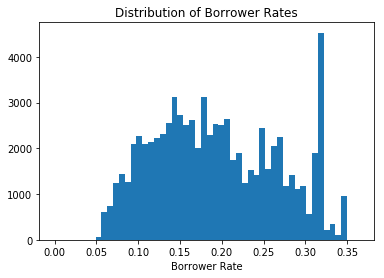

In [7]:
bins = np.arange(0, loan_df2["BorrowerRate"].max()+0.007, 0.007)
plt.hist(data=loan_df2, x="BorrowerRate", bins=bins)
plt.title("Distribution of Borrower Rates")
plt.xlabel("Borrower Rate")
plt.show();

## Distribution of Loan Amount

> The Loan original amount has a multimodal distribution, with the highest peaks around \\$4K, \\$10K, and \\$15K. Most of the loans taken have values less that \\$10,000, very few loans have values greater than \\$26,000

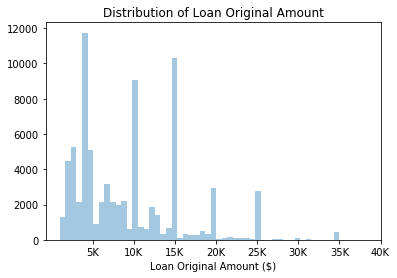

In [8]:
bins= np.arange(0, loan_df2["LoanOriginalAmount"].max()+0.025, 0.025)
sb.distplot(loan_df2["LoanOriginalAmount"], kde=False)
x_ticks = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
x_ticks_names = ["5K", "10K", "15K", "20K", "25K", "30K", "35K", "40K"]
plt.xticks(x_ticks, x_ticks_names)

plt.xlabel("Loan Original Amount ($)")
plt.title("Distribution of Loan Original Amount")
plt.show();
#sb.distplot(loan_df2["LoanOriginalAmount"])

## Relationship between Borrower Rate, Credit Score and Monthly Loan Payment
Borrowers with higher credit scores have higher proportion of low borrower rates, those with very good credit scores have few loans with borrower rates greater than 0.2. Also, borrowers with higher monthly payments have lower credit rates generally.


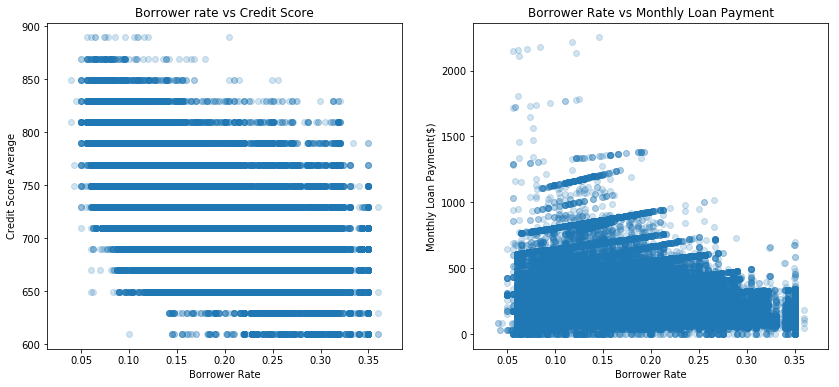

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(data=loan_df2, x="BorrowerRate", y="CreditScoreAverage", alpha=0.2 )
plt.xlabel("Borrower Rate")
plt.ylabel("Credit Score Average")
plt.title("Borrower rate vs Credit Score")

plt.subplot(1,2,2)
plt.scatter(data=loan_df2, x="BorrowerRate", y="MonthlyLoanPayment", alpha=0.2)
plt.xlabel("Borrower Rate")
plt.ylabel("Monthly Loan Payment($)")
plt.title("Borrower Rate vs Monthly Loan Payment");

## Relationship between Borrower Rate, Prosper Score and Prosper Rating

Borrowers with better Prosper ratings (A, AA) generally had lower interest rates, which might mean Prosper rewards borrowers with good Prosper ratings with lower borrower rates.
Borrowers with higher risk scores(Prosper Score, best is 11, worst is 1) had lower interest rates, and those with lower risk scores had higher borrower rates.

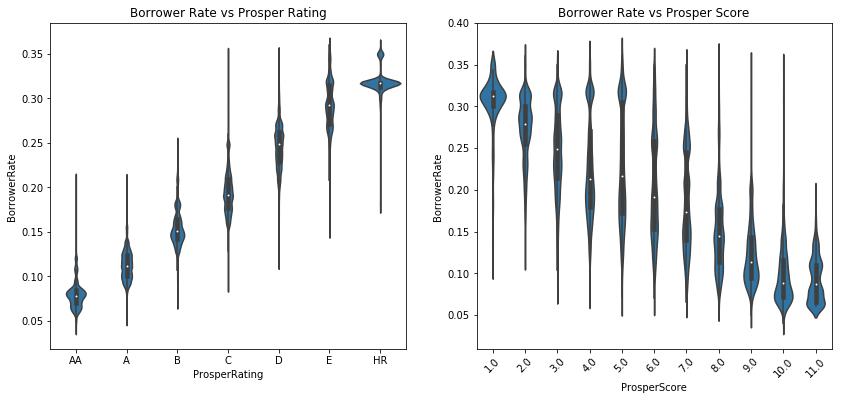

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sb.violinplot(data=loan_df2, x="ProsperRating", y="BorrowerRate", color=base_color)
plt.title("Borrower Rate vs Prosper Rating")


plt.subplot(1,2,2)
sb.violinplot(data=loan_df2, x="ProsperScore", y="BorrowerRate", color=base_color)
plt.xticks(rotation=45)
plt.title("Borrower Rate vs Prosper Score");


## Relationship between Loan Amount, Credit Score and Monthly Loan Payment
Borrowers with good credit scores had higher value loans than those with poor/average credit scores. Also, as expected, there is a positive correlation between loan amount and monthly loan payment.


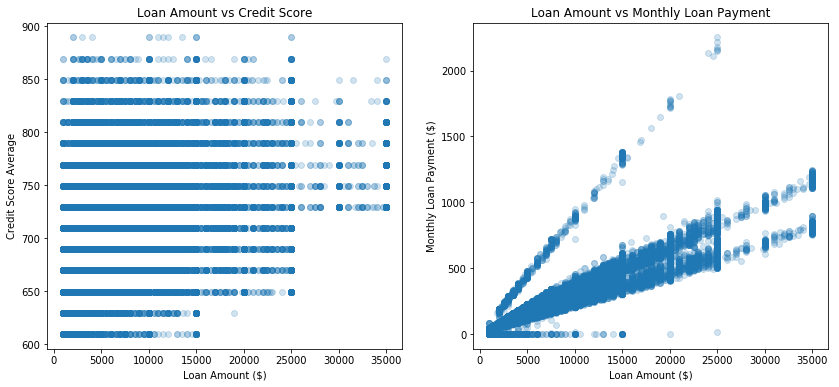

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(data=loan_df2, x="LoanOriginalAmount", y="CreditScoreAverage", alpha=0.2 )
plt.xlabel("Loan Amount ($)")
plt.ylabel("Credit Score Average")
plt.title("Loan Amount vs Credit Score")

plt.subplot(1,2,2)
plt.scatter(data=loan_df2, x="LoanOriginalAmount", y="MonthlyLoanPayment", alpha=0.2)
plt.xlabel("Loan Amount ($)")
plt.ylabel("Monthly Loan Payment ($)")
plt.title("Loan Amount vs Monthly Loan Payment");

## Relationship between Loan Amount, Prosper Score and Prosper Rating
Most borrowers with poor ratings(E, HR) have low value loans, less than $5K. The value of loans in each category reduces as the rating reduces.
Also, the lower risk scores are more populated with lower value loans, the chances of getting a high value loan decreases as the ProsperScore decreases.


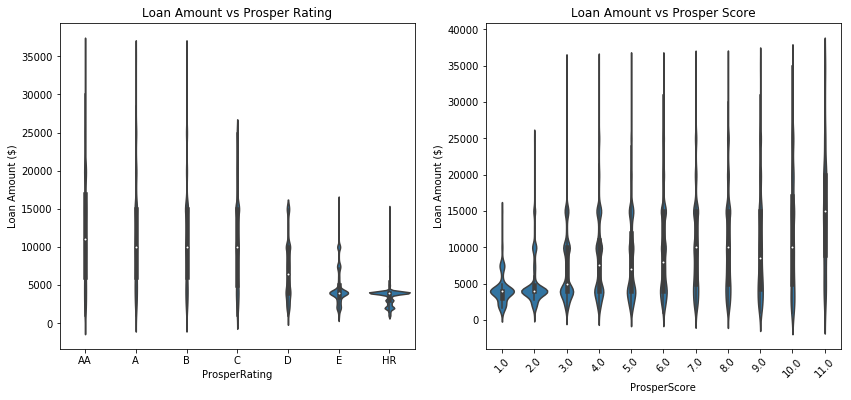

In [14]:
#Loan Amount & Prosper rating/prosper score
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sb.violinplot(data=loan_df2, x="ProsperRating", y="LoanOriginalAmount", color=base_color)
plt.ylabel("Loan Amount ($)")
plt.title("Loan Amount vs Prosper Rating")


plt.subplot(1,2,2)
sb.violinplot(data=loan_df2, x="ProsperScore", y="LoanOriginalAmount", color=base_color)
plt.xticks(rotation=45)
plt.ylabel("Loan Amount ($)")
plt.title("Loan Amount vs Prosper Score");


## Relationship between Loan Amount, Borrower Rate and Income Range
As expected, lower income earners borrow smaller amounts, and high income earners have a higher proportion of low borrower rates

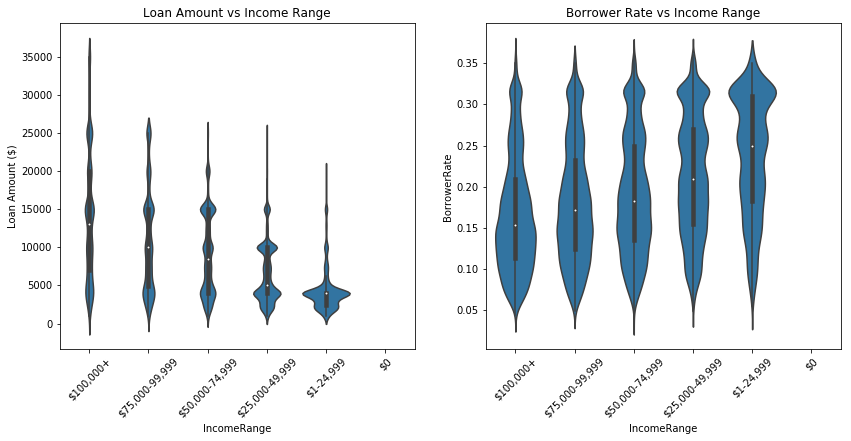

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
order = ["$100,000+", "$75,000-99,999", "$50,000-74,999", "$25,000-49,999", "$1-24,999", "$0"]
sb.violinplot(data=loan_df2, x="IncomeRange", y="LoanOriginalAmount", color=base_color, order=order)
plt.xticks(rotation=45)
plt.ylabel("Loan Amount ($)")
plt.title("Loan Amount vs Income Range")

plt.subplot(1,2,2)
sb.violinplot(data=loan_df2, x="IncomeRange", y="BorrowerRate", color=base_color, order=order)
plt.xticks(rotation=45)
plt.title("Borrower Rate vs Income Range");

## Loan Amount by Income Range and Home Ownership
There's a slight increase in the proportion of high value loans given to home owners than non home owners. A higher income and being a home owner might increase the chances of getting a high value loan.

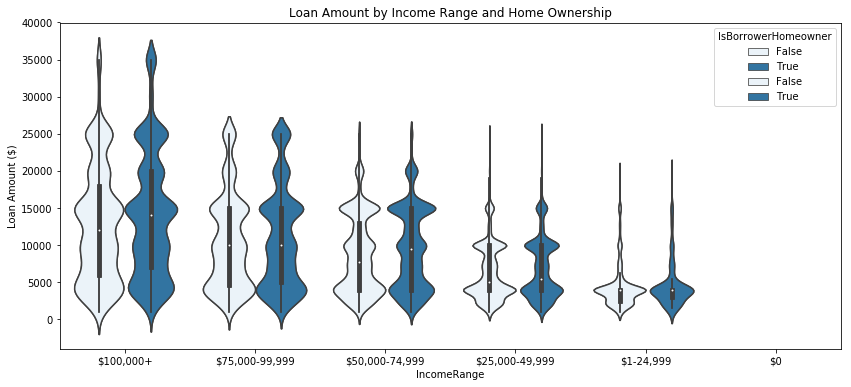

In [16]:
order = ["$100,000+", "$75,000-99,999", "$50,000-74,999", "$25,000-49,999", "$1-24,999", "$0"]
order = ["$100,000+", "$75,000-99,999", "$50,000-74,999", "$25,000-49,999", "$1-24,999", "$0"]
plt.figure(figsize=(14,6))
sb.violinplot(data=loan_df2, x ="IncomeRange", y ="LoanOriginalAmount", hue ="IsBorrowerHomeowner", color = base_color, order=order)
sb.violinplot(data=loan_df2, x ="IncomeRange", y ="LoanOriginalAmount", hue ="IsBorrowerHomeowner", color = base_color, order=order)
plt.ylabel("Loan Amount ($)")
plt.title("Loan Amount by Income Range and Home Ownership");

## Relationship between Prosper Score and Income Range
Borrowers with Prosper Scoe between 1 and 5 generally earn between  \\$25𝐾 𝑎𝑛𝑑 \\$74,999, so higher earnings does not mean they will have better Prosper scores. This might also be due to the fact that there are more middle income earners in this dataset than any other group. In the worst Prosper Score, very high income earners(\\$100K+) are the most popular.

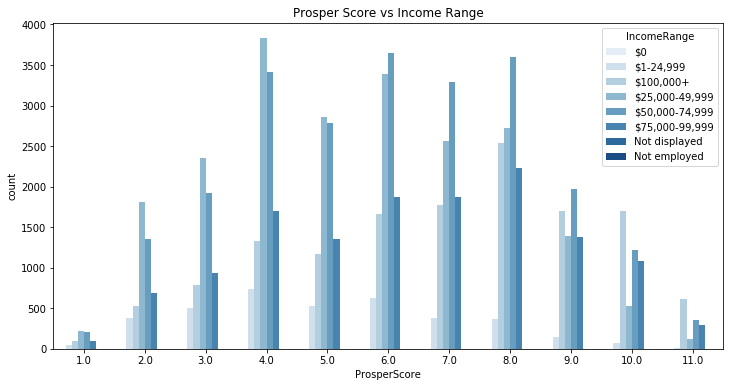

In [17]:
plt.figure(figsize=(12,6))
sb.countplot(data=loan_df2, hue= "IncomeRange", x="ProsperScore", palette="Blues")
plt.title("Prosper Score vs Income Range");


In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt